In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df1 = pd.read_csv(r"C:\Users\rosem\Downloads\Paper_works\CSVs\Feature_engg_Paper2.csv")
df = df1[df1['Region'].isin(['CAL','TEX'])]
df

,Date,Hour,Demand,Net_Generation,Total_Interchange,Forecasted_Demand,Coal_Gen,Gas_Gen,Nuclear_Gen,Hydro_Gen,...,Rolling_Mean_24H,Rolling_Mean_3H_Emission,Rolling_Mean_24H_Emission,Total_Gen,Renewable_Pct,Fossil_Pct,Renewable_Demand,Fossil_Demand,Demand_diff1,Demand_diff24
0,2018-07-01 17:00:00,12.5,28976.042,21138.304,-6528.677,28386.220,8.764,7725.951,2261.073,3089.741,...,42604.509,27096.582,17297.042,17521.203,42.950,44.145,1244530.613,1279144.078,89.458,172.875
1,2018-07-01 18:00:00,12.5,29065.500,21217.885,-6554.521,28486.010,8.792,7761.917,2261.062,3110.594,...,41847.195,8244.812,17052.778,17577.073,42.927,44.209,1247693.394,1284966.639,89.458,172.875
2,2018-07-01 19:00:00,12.5,29154.958,21297.467,-6580.365,28585.800,8.819,7797.882,2261.052,3131.446,...,45629.697,24266.186,19327.269,17632.943,42.904,44.273,1250856.313,1290788.823,89.458,172.875
3,2018-07-01 20:00:00,12.5,29244.417,21377.049,-6606.208,28685.590,8.847,7833.847,2261.042,3152.299,...,48609.446,6436.826,20904.933,17688.812,42.881,44.337,1254019.366,1296610.635,89.458,172.875
4,2018-07-01 21:00:00,12.5,29333.875,21456.630,-6632.052,28785.380,8.875,7869.812,2261.031,3173.151,...,49142.567,6326.084,21205.564,17744.682,42.858,44.400,1257182.553,1302432.078,89.458,172.875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525055,2023-06-29 20:00:00,12.5,64967.778,65025.979,58.042,65732.083,8989.486,27552.910,4647.181,32.896,...,49409.849,30361.664,19267.173,46077.069,10.607,79.307,689127.079,5152407.218,-65.642,-1360.549
525056,2023-06-29 21:00:00,12.5,64902.135,64963.474,61.177,65699.302,8993.729,27593.401,4647.292,33.224,...,46137.266,13730.128,18243.586,46106.208,10.566,79.354,685784.748,5150245.412,-65.642,-1414.266
525057,2023-06-29 22:00:00,12.5,64836.493,64900.969,64.312,65666.521,8997.972,27633.892,4647.403,33.552,...,45454.091,12961.713,16905.630,46135.347,10.526,79.401,682451.108,5148073.607,-65.642,-1467.983
525058,2023-06-29 23:00:00,12.5,64770.851,64838.464,67.448,65633.740,9002.215,27674.384,4647.514,33.880,...,39779.804,15939.369,14414.641,46164.486,10.485,79.448,679126.143,5145891.821,-65.642,-1521.700


In [4]:
df1.shape

(525060, 45)

In [5]:
df.shape

(87561, 45)

In [6]:
df.columns.to_list()

['Date',
 'Hour',
 'Demand',
 'Net_Generation',
 'Total_Interchange',
 'Forecasted_Demand',
 'Coal_Gen',
 'Gas_Gen',
 'Nuclear_Gen',
 'Hydro_Gen',
 'Solar_Gen',
 'CO2_Factor_Coal',
 'CO2_Factor_Gas',
 'CO2_Emissions_Coal',
 'CO2_Emissions_Gas',
 'CO2_Total_Emissions',
 'CO2_Intensity_Generated',
 'CO2_Intensity_Consumed',
 'Month',
 'DayOfWeek',
 'Is_Weekend',
 'DayOfYear',
 'WeekOfYear',
 'Region',
 'Season_Autumn',
 'Season_Spring',
 'Season_Summer',
 'Season_Winter',
 'Demand_Prev_Hour',
 'Demand_Yesterday_Same_Hour',
 'Demand_Last_Week_Same_Hour',
 'Emission_Prev_Hour',
 'Emission_Yesterday_Same_Hour',
 'Emission_Last_Week_Same_Hour',
 'Rolling_Mean_3H',
 'Rolling_Mean_24H',
 'Rolling_Mean_3H_Emission',
 'Rolling_Mean_24H_Emission',
 'Total_Gen',
 'Renewable_Pct',
 'Fossil_Pct',
 'Renewable_Demand',
 'Fossil_Demand',
 'Demand_diff1',
 'Demand_diff24']

In [7]:
summary = df.groupby('Region')[['Demand', 'CO2_Total_Emissions']].describe(
    percentiles=[0.25, 0.5, 0.75]
).transpose()

# Keep only the relevant statistics for journal table
summary = summary.loc[:, ['CAL', 'TEX']]
summary = summary.loc[
    (slice(None), ['mean', 'std', 'min', '25%', '50%', '75%', 'max']),
]

# Clean up row indices for readability
summary.index = pd.MultiIndex.from_tuples(
    [(var.replace('CO2_Total_Emissions', 'CO₂ Emissions').replace('Demand', 'Demand'), stat)
     for var, stat in summary.index],
    names=["Variable", "Statistic"]
)
summary = summary.reset_index()
# Save to CSV (optional for LaTeX/journal import)
#summary.to_csv('descriptive_stats_CA_TX.csv')

In [8]:
summary

Region,Variable,Statistic,CAL,TEX
0,Demand,mean,30713.002934,45379.915651
1,Demand,std,4600.541085,7548.859037
2,Demand,min,22374.958000,32184.500000
3,Demand,25%,27572.494750,39215.326000
4,Demand,50%,29238.446500,43694.583000
5,Demand,75%,33393.075250,51197.854000
6,Demand,max,49632.750000,68942.833000
7,CO₂ Emissions,mean,5253.953788,17200.220438
8,CO₂ Emissions,std,1728.626302,4453.391485
9,CO₂ Emissions,min,1507.548000,6050.208000


In [9]:
print(df['Date'].head(10))

0    2018-07-01 17:00:00
1    2018-07-01 18:00:00
2    2018-07-01 19:00:00
3    2018-07-01 20:00:00
4    2018-07-01 21:00:00
5    2018-07-01 22:00:00
6    2018-07-01 23:00:00
7    2018-07-02 00:00:00
8    2018-07-02 01:00:00
9    2018-07-02 02:00:00
Name: Date, dtype: object


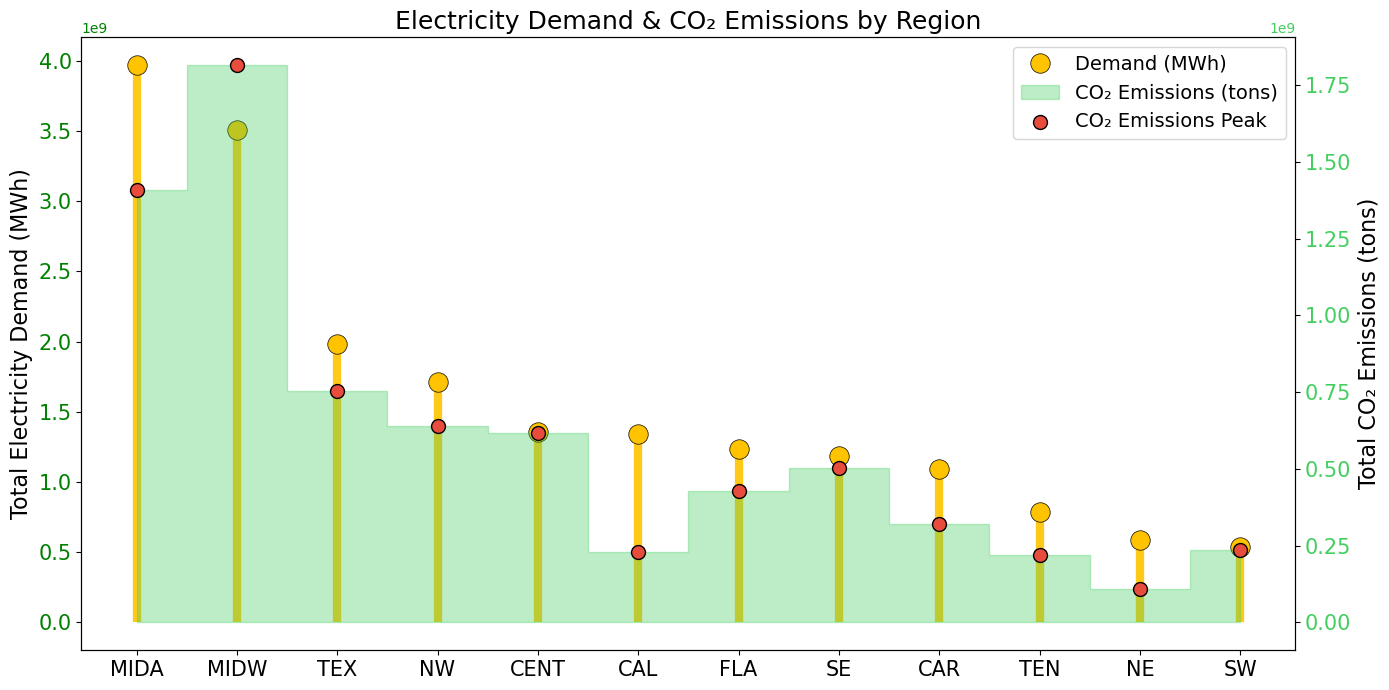

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv(r"C:\Users\rosem\Downloads\Paper_works\CSVs\Feature_engg_Paper2.csv")
df['Date'] = pd.to_datetime(df['Date'])
region_grouped = df.groupby('Region').agg({
    'Demand': 'sum',
    'CO2_Total_Emissions': 'sum'
}).reset_index()

region_grouped = region_grouped.sort_values('Demand', ascending=False)
regions = region_grouped['Region'].values
y_pos = np.arange(len(regions))

fig, ax1 = plt.subplots(figsize=(14, 7))

# --- Demand as lollipop plot (yellow-green) ---
ax1.vlines(y_pos, 0, region_grouped['Demand'], color='#FFC300', alpha=0.9, linewidth=6)
ax1.plot(
    y_pos,
    region_grouped['Demand'],
    "o",
    color='#FFC300',
    label='Demand (MWh)',
    markersize=14,
    mec='black',   # Border color
    mew=0.5          # Border thickness
)
ax1.set_xticks(y_pos)
ax1.set_xticklabels(regions, fontsize=15)
ax1.set_ylabel("Total Electricity Demand (MWh)", color='black', fontsize=16)
ax1.tick_params(axis='y', labelcolor='green', labelsize=15)
ax1.tick_params(axis='x', labelsize=15)

# --- CO₂ Emissions as area only (soft green) ---
ax2 = ax1.twinx()
ax2.fill_between(
    y_pos,
    0,
    region_grouped['CO2_Total_Emissions'],
    step='mid',
    alpha=0.35,
    color='#44ce60',     # Soft green
    label='CO₂ Emissions (tons)'
)
ax2.scatter(
    y_pos,
    region_grouped['CO2_Total_Emissions'],
    color='#e74c3c',     # Bright red
    s=100,
    edgecolor='black',
    zorder=10,
    label='CO₂ Emissions Peak'
)
ax2.set_ylabel("Total CO₂ Emissions (tons)", color='black', fontsize=16)
ax2.tick_params(axis='y', labelcolor='#44ce60', labelsize=15)

# --- Legends ---
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right', fontsize=14)

plt.title('Electricity Demand & CO₂ Emissions by Region', fontsize=18)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


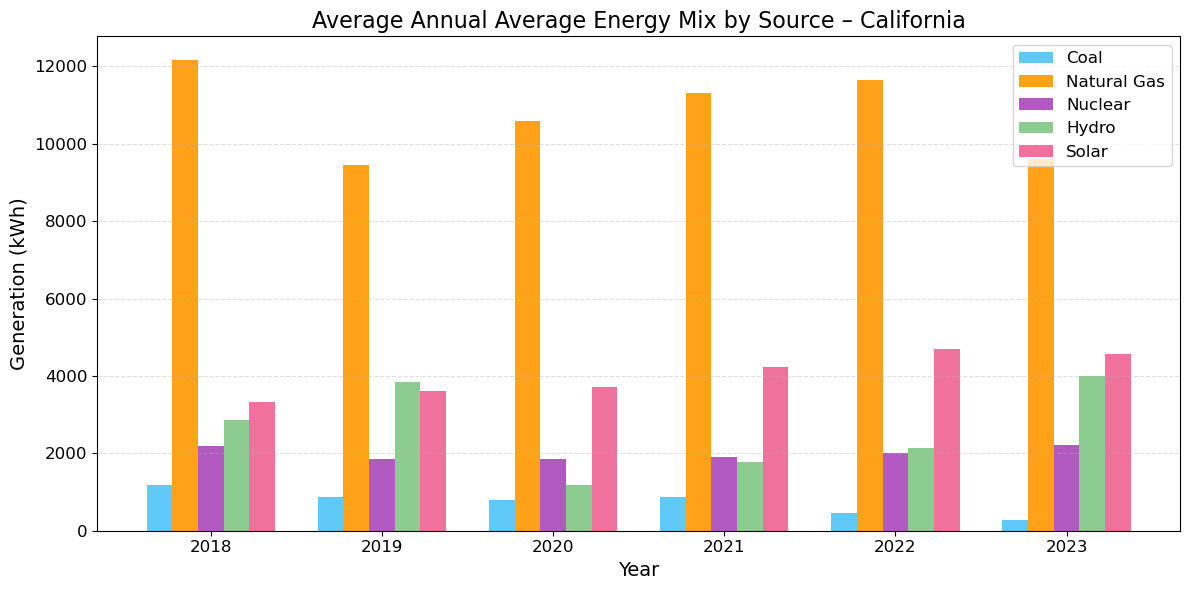

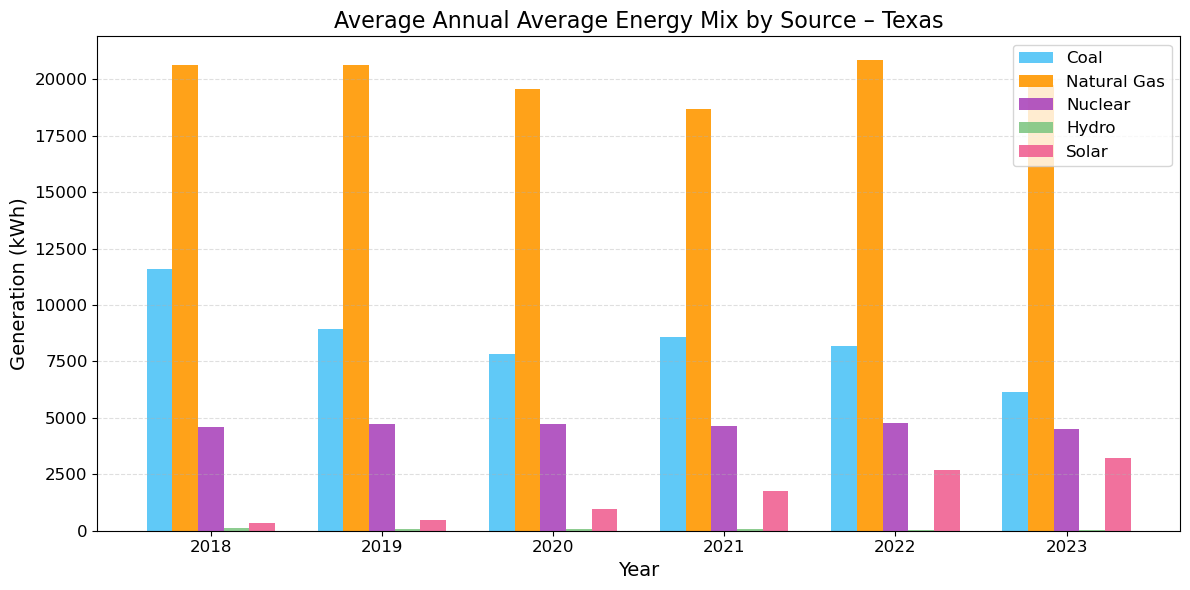

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

energy_sources = ['Coal_Gen', 'Gas_Gen', 'Nuclear_Gen', 'Hydro_Gen', 'Solar_Gen']
energy_labels = ['Coal', 'Natural Gas', 'Nuclear', 'Hydro', 'Solar']

custom_colors = ['#4FC3F7', '#FF9800', '#AB47BC', '#81C784', '#F06292']

region_map = {'CAL': 'California', 'TEX': 'Texas'}

for region_code, region_name in region_map.items():
    region_df = df[df['Region'] == region_code].copy()
    region_df['Year'] = region_df['Date'].dt.year

    yearly_avg = region_df.groupby('Year')[energy_sources].mean()
    years = yearly_avg.index.values.astype(int)

    x = np.arange(len(years))
    width = 0.15

    fig, ax = plt.subplots(figsize=(12, 6))

    for i, src in enumerate(energy_sources):
        ax.bar(
            x + width*i,
            yearly_avg[src],
            width,
            label=energy_labels[i],
            color=custom_colors[i],
            alpha=0.9
        )

    ax.set_xlabel('Year', fontsize=14)
    ax.set_ylabel('Generation (kWh)', fontsize=14)
    ax.set_title(f'Average Annual Average Energy Mix by Source – {region_name}', fontsize=16)
    ax.set_xticks(x + width*2)
    ax.set_xticklabels(years, fontsize=12)
    ax.legend(fontsize=12, loc='upper right')
    ax.grid(axis='y', linestyle='--', alpha=0.4)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()


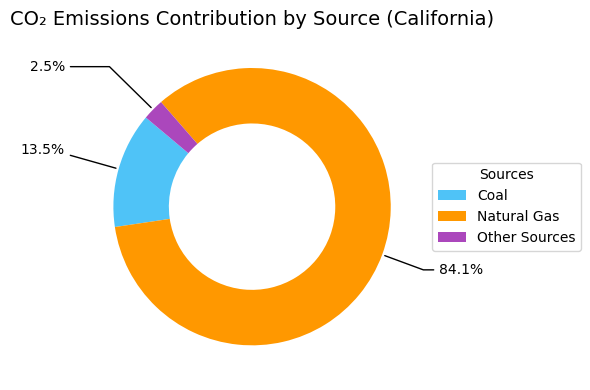

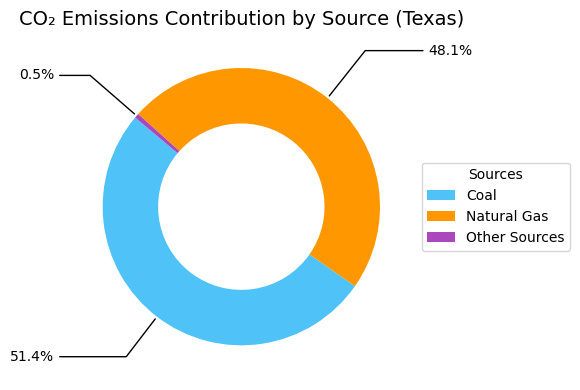

In [12]:
import matplotlib.pyplot as plt
import numpy as np

custom_colors = ['#4FC3F7', '#FF9800', '#AB47BC']  # Teal Blue, Orange, Purple

region_map = {'CAL': 'California', 'TEX': 'Texas'}
for region_code, region_name in region_map.items():
    region_df = df[df['Region'] == region_code]
    total_emissions = {
        'Coal': region_df['CO2_Emissions_Coal'].sum(),
        'Natural Gas': region_df['CO2_Emissions_Gas'].sum(),
        'Other Sources': region_df['CO2_Total_Emissions'].sum() - (
            region_df['CO2_Emissions_Coal'].sum() + region_df['CO2_Emissions_Gas'].sum()
        )
    }
    sources = list(total_emissions.keys())
    values = list(total_emissions.values())
    percentages = [v / sum(values) * 100 for v in values]

    fig, ax = plt.subplots(figsize=(6, 4), dpi=100)
    wedges, texts = ax.pie(
        values,
        startangle=140,
        colors=custom_colors,
        wedgeprops=dict(width=0.4)
    )

    # Add labels outside
    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        ax.annotate(f"{percentages[i]:.1f}%",
                    xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                    horizontalalignment=horizontalalignment,
                    fontsize=10,
                    arrowprops=dict(arrowstyle="-", connectionstyle=connectionstyle))
    
    ax.set_title(f'CO₂ Emissions Contribution by Source ({region_name})', fontsize=14)
    plt.legend(wedges, sources, title="Sources", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.tight_layout()
    plt.show()


In [13]:
df = pd.read_csv(r"C:\Users\rosem\Downloads\Paper_works\CSVs\Feature_engg_Paper2.csv")
df = df[df['Region'].isin(['CAL','TEX'])]
df

,Date,Hour,Demand,Net_Generation,Total_Interchange,Forecasted_Demand,Coal_Gen,Gas_Gen,Nuclear_Gen,Hydro_Gen,...,Rolling_Mean_24H,Rolling_Mean_3H_Emission,Rolling_Mean_24H_Emission,Total_Gen,Renewable_Pct,Fossil_Pct,Renewable_Demand,Fossil_Demand,Demand_diff1,Demand_diff24
0,2018-07-01 17:00:00,12.5,28976.042,21138.304,-6528.677,28386.220,8.764,7725.951,2261.073,3089.741,...,42604.509,27096.582,17297.042,17521.203,42.950,44.145,1244530.613,1279144.078,89.458,172.875
1,2018-07-01 18:00:00,12.5,29065.500,21217.885,-6554.521,28486.010,8.792,7761.917,2261.062,3110.594,...,41847.195,8244.812,17052.778,17577.073,42.927,44.209,1247693.394,1284966.639,89.458,172.875
2,2018-07-01 19:00:00,12.5,29154.958,21297.467,-6580.365,28585.800,8.819,7797.882,2261.052,3131.446,...,45629.697,24266.186,19327.269,17632.943,42.904,44.273,1250856.313,1290788.823,89.458,172.875
3,2018-07-01 20:00:00,12.5,29244.417,21377.049,-6606.208,28685.590,8.847,7833.847,2261.042,3152.299,...,48609.446,6436.826,20904.933,17688.812,42.881,44.337,1254019.366,1296610.635,89.458,172.875
4,2018-07-01 21:00:00,12.5,29333.875,21456.630,-6632.052,28785.380,8.875,7869.812,2261.031,3173.151,...,49142.567,6326.084,21205.564,17744.682,42.858,44.400,1257182.553,1302432.078,89.458,172.875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525055,2023-06-29 20:00:00,12.5,64967.778,65025.979,58.042,65732.083,8989.486,27552.910,4647.181,32.896,...,49409.849,30361.664,19267.173,46077.069,10.607,79.307,689127.079,5152407.218,-65.642,-1360.549
525056,2023-06-29 21:00:00,12.5,64902.135,64963.474,61.177,65699.302,8993.729,27593.401,4647.292,33.224,...,46137.266,13730.128,18243.586,46106.208,10.566,79.354,685784.748,5150245.412,-65.642,-1414.266
525057,2023-06-29 22:00:00,12.5,64836.493,64900.969,64.312,65666.521,8997.972,27633.892,4647.403,33.552,...,45454.091,12961.713,16905.630,46135.347,10.526,79.401,682451.108,5148073.607,-65.642,-1467.983
525058,2023-06-29 23:00:00,12.5,64770.851,64838.464,67.448,65633.740,9002.215,27674.384,4647.514,33.880,...,39779.804,15939.369,14414.641,46164.486,10.485,79.448,679126.143,5145891.821,-65.642,-1521.700


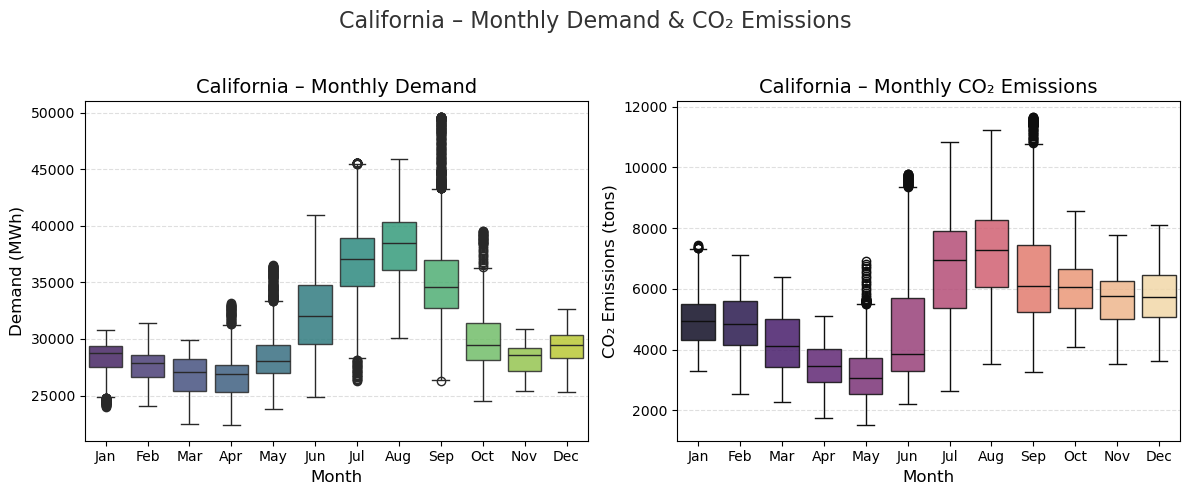

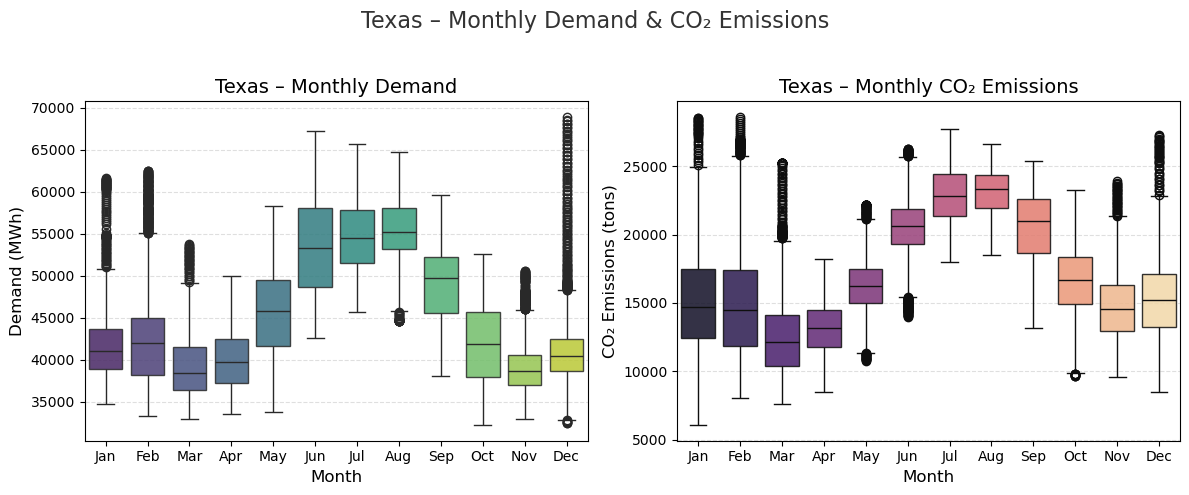

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])
df['Month'] = df['Date'].dt.month

# improved color palettes
palette_demand = sns.color_palette('viridis', 12)
palette_emiss = sns.color_palette('magma', 12)

for region, region_title in zip(['CAL', 'TEX'], ['California', 'Texas']):
    region_data = df[df['Region'] == region].copy()

    # smaller figure size to fit better in the paper
    fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharex=True)

    sns.boxplot(
        x='Month', y='Demand', data=region_data,
        palette=palette_demand, ax=axs[0], boxprops=dict(alpha=0.85)
    )
    axs[0].set_title(f'{region_title} – Monthly Demand', fontsize=14)
    axs[0].set_xlabel('Month', fontsize=12)
    axs[0].set_ylabel('Demand (MWh)', fontsize=12)
    axs[0].set_xticks(range(12))
    axs[0].set_xticklabels([calendar.month_abbr[i+1] for i in range(12)], fontsize=10)
    axs[0].tick_params(axis='y', labelsize=10)
    axs[0].grid(axis='y', linestyle='--', alpha=0.4)

    sns.boxplot(
        x='Month', y='CO2_Total_Emissions', data=region_data,
        palette=palette_emiss, ax=axs[1], boxprops=dict(alpha=0.85)
    )
    axs[1].set_title(f'{region_title} – Monthly CO₂ Emissions', fontsize=14)
    axs[1].set_xlabel('Month', fontsize=12)
    axs[1].set_ylabel('CO₂ Emissions (tons)', fontsize=12)
    axs[1].set_xticks(range(12))
    axs[1].set_xticklabels([calendar.month_abbr[i+1] for i in range(12)], fontsize=10)
    axs[1].tick_params(axis='y', labelsize=10)
    axs[1].grid(axis='y', linestyle='--', alpha=0.4)

    plt.suptitle(f'{region_title} – Monthly Demand & CO₂ Emissions', fontsize=16, color='#333')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


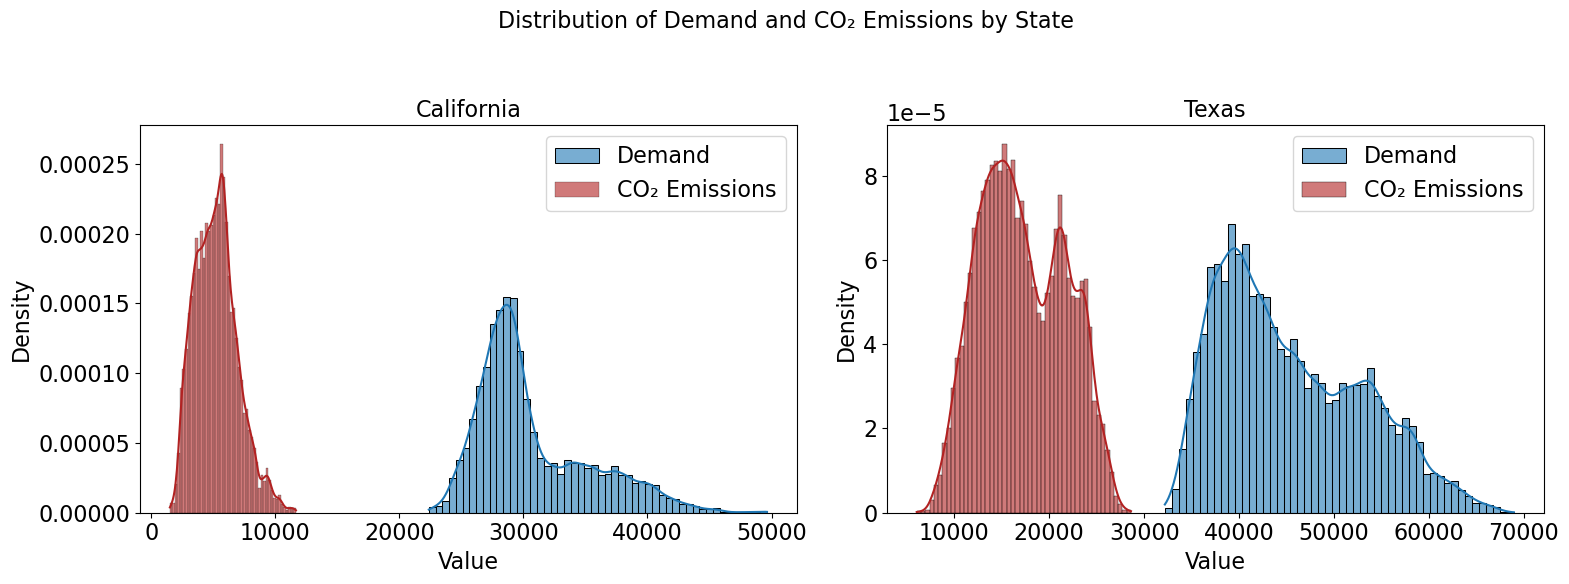

In [15]:
region_map = {'CAL': 'California', 'TEX': 'Texas'}
df['Region_Name'] = df['Region'].map(region_map)

plt.rcParams.update({
     'font.size': 16,
    'axes.titlesize': 16,
    'axes.labelsize': 16,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'legend.fontsize': 16,
    'figure.titlesize': 16
})

fig, axs = plt.subplots(1, 2, figsize=(16, 6))  # wider but shorter
for i, region in enumerate(['California', 'Texas']):
    sns.histplot(
        df[df['Region_Name'] == region]['Demand'],
        bins=50, kde=True,
        color='#1f77b4',  # softer blue
        label='Demand',
        stat="density", alpha=0.6, ax=axs[i]
    )
    sns.histplot(
        df[df['Region_Name'] == region]['CO2_Total_Emissions'],
        bins=50, kde=True,
        color='firebrick',
        label='CO₂ Emissions',
        stat="density", alpha=0.6, ax=axs[i]
    )
    axs[i].set_title(f'{region}')
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Density')
    axs[i].legend()

plt.suptitle('Distribution of Demand and CO₂ Emissions by State', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
